In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('Demographics.csv')

In [4]:
dexcom_df = pd.read_csv('Dexcom_001.csv')
dexcom_df = dexcom_df[12:].drop(columns=['Index'])
dexcom_df['ID'] = int('001')

dexcom_df

ids = ['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016']
for id in ids:
    temp_df = pd.read_csv(f"Dexcom_{id}.csv")
    temp_df = temp_df[12:].drop(columns=['Index'])
    temp_df['ID'] = int(id)
    dexcom_df = pd.concat([dexcom_df, temp_df], ignore_index=True)

dexcom_df

,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),ID
0,2020-02-13 17:23:32,EGV,NaN,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,NaN,11101.0,1
1,2020-02-13 17:28:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,11401.0,1
2,2020-02-13 17:33:32,EGV,NaN,NaN,NaN,iPhone G6,58.0,NaN,NaN,NaN,NaN,11701.0,1
3,2020-02-13 17:38:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,12001.0,1
4,2020-02-13 17:43:31,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,12301.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,2020-07-24 09:58:05,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,696577.0,16
36884,2020-07-24 10:03:05,EGV,NaN,NaN,NaN,iPhone G6,108.0,NaN,NaN,NaN,NaN,696877.0,16
36885,2020-07-24 10:08:05,EGV,NaN,NaN,NaN,iPhone G6,106.0,NaN,NaN,NaN,NaN,697177.0,16
36886,2020-07-24 10:13:05,EGV,NaN,NaN,NaN,iPhone G6,102.0,NaN,NaN,NaN,NaN,697477.0,16


In [5]:
dexcom_df['Carb Value (grams)'].unique()

array([nan])

In [6]:
food_df = pd.read_csv('Food_Log_001.csv')
food_df['ID'] = int('011')

ids = ['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016']
for id in ids:
    temp_df = pd.read_csv(f"Food_Log_{id}.csv")
    temp_df['ID'] = int(id)
    food_df = pd.concat([food_df, temp_df], ignore_index=True)

food_df = food_df.drop(columns =['2020-02-22', '10:30:00',
       '2020-02-22 10:30:00', 'Chicken Nuggets', '8.0', 'piece',
       'Chicken Nuggets.1', '393.0', '19.0', '0.1', '20.0'], axis=1)
food_df

,date,time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,ID,time_of_day
0,2020-02-13,18:00:00,2020-02-13 18:00:00,NaN,Berry Smoothie,20.0,fluid ounce,Strawberry Smoothie,456.0,85.0,1.7,83.0,16.0,3.3,11,NaN
1,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Chicken Leg,1.0,NaN,chicken leg,475.0,0.0,0.0,0.0,62.0,23.0,11,NaN
2,2020-02-13,20:30:00,2020-02-13 20:30:00,NaN,Asparagus,4.0,NaN,Asparagus,13.0,2.5,1.2,0.8,1.4,0.1,11,NaN
3,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Natrel Lactose Free 2 Percent,8.0,fluid ounce,(Natrel) Lactose Free 2% Partly Skimmed Milk,120.0,9.0,NaN,8.0,12.0,NaN,11,NaN
4,2020-02-14,07:10:00,2020-02-14 07:10:00,NaN,Standard Breakfast,0.75,cup,"(Kellogg's) Frosted Flakes, Cereal",110.0,26.0,NaN,10.0,1.0,NaN,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,2/26/2020,NaN,2020-02-26 18:30:00,NaN,Lemonade,32,oz,NaN,99.0,26.0,0.0,25.0,0.2,0.1,16,18:30
1417,2/27/2020,NaN,2020-02-27 10:30:00,NaN,Standard breakfast,NaN,NaN,NaN,280.0,56.5,1.0,24.0,8.0,2.5,16,10:30
1418,2/27/2020,NaN,2020-02-27 11:30:00,NaN,Plain cheese pizza,1,slices,NaN,452.0,57.0,3.9,6.1,19.0,16.0,16,11:30
1419,2/27/2020,NaN,2020-02-27 11:30:00,NaN,cooked black eyed peas,1,cup,NaN,198.0,35.0,11.0,5.6,13.0,0.9,16,11:30


In [7]:
food_df[food_df['logged_food'] == "Babel Cheese"]

,date,time,time_begin,time_end,logged_food,amount,unit,searched_food,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,ID,time_of_day
15,2020-02-15,15:30:00,2020-02-15 15:30:00,NaN,Babel Cheese,1.0,NaN,Babybel Cheese,71.0,0.3,NaN,0.3,5.0,NaN,11,NaN


In [8]:
food_df.groupby('logged_food')['calorie'].mean().sort_values(ascending=False).head(10)


logged_food
(Pillsbury) Cinammon Rolls                 2245.00
(Red Baron) Brick Oven Pepperoni Pizza     1360.00
Totinos pizza                              1320.00
(Outback Steakhouse) Chicken Tacos         1210.00
Cheddar Cheese                             1145.00
Pizza Triangles                            1138.00
Plain cheese pizza                         1130.00
Hamburger                                  1080.00
12" Italian BMT Subway whole wheat mayo    1064.00
cookie                                     1033.65
Name: calorie, dtype: float64

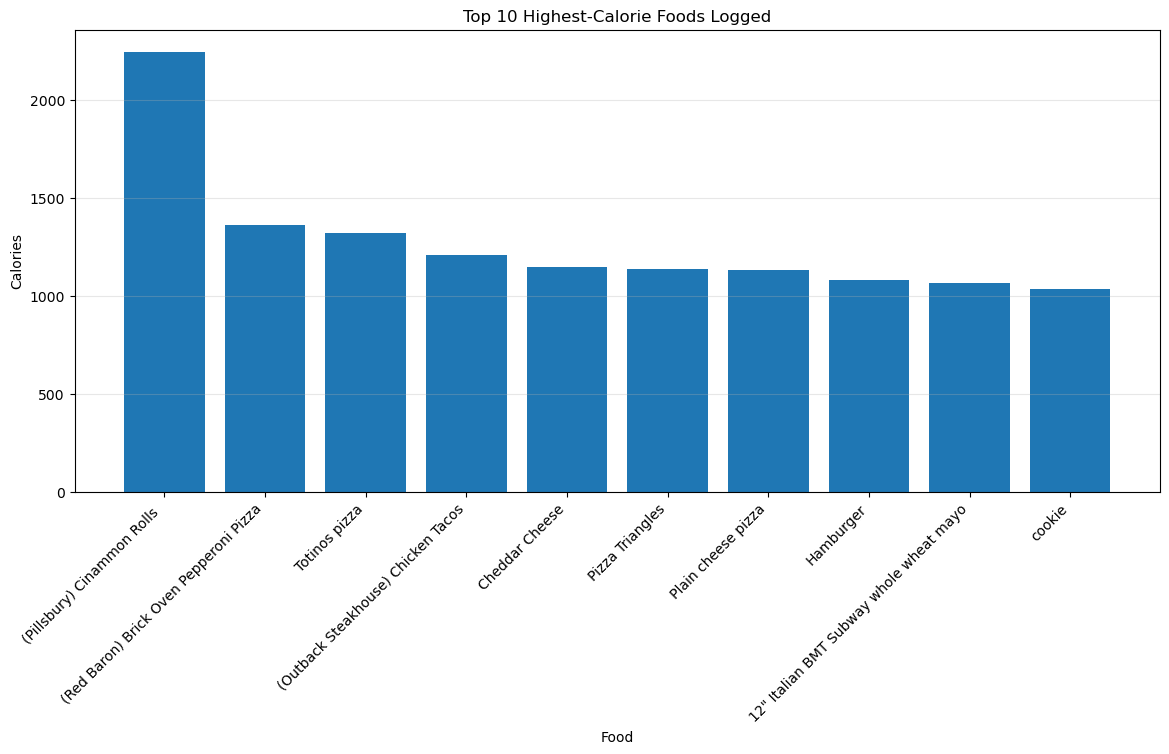

In [9]:
##First EDA
top_10_food_by_cal = food_df.groupby('logged_food')['calorie'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14,6))
plt.bar(top_10_food_by_cal['logged_food'], top_10_food_by_cal['calorie'])
plt.xlabel('Food'); plt.ylabel('Calories')
plt.title('Top 10 Highest-Calorie Foods Logged')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha = 0.3)
plt.show()



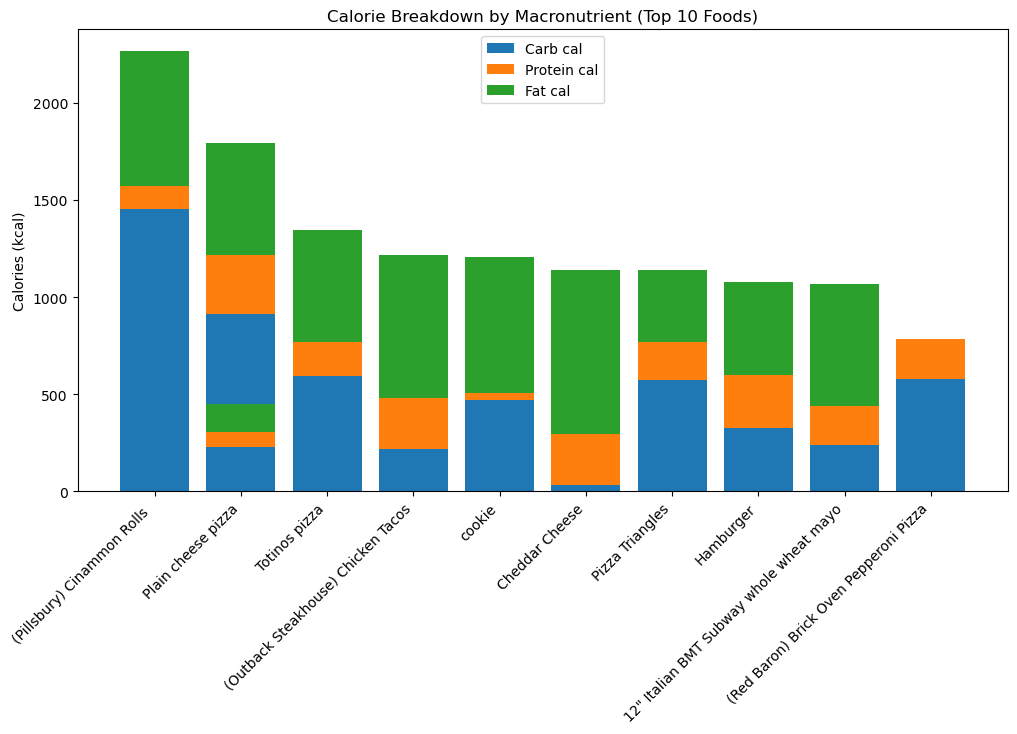

In [20]:
##Second EDA

top10_foods = food_df[food_df['logged_food'].isin(top_10_food_by_cal['logged_food'])].copy()

top10_foods['carb_cal'] = top10_foods['total_carb'] * 4
top10_foods['protein_cal'] = top10_foods['protein'] * 4
top10_foods['fat_cal'] = top10_foods['total_fat'] * 9

top10_foods = top10_foods[['logged_food', 'carb_cal', 'protein_cal', 'fat_cal']]
top10_foods['total_cal'] = top10_foods['carb_cal'] + top10_foods['protein_cal'] + top10_foods['fat_cal']
top10_foods = top10_foods.sort_values('total_cal', ascending=False)

labels = top10_foods['logged_food']
carb = top10_foods['carb_cal']
protein = top10_foods['protein_cal']
fat = top10_foods['fat_cal']

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(labels, carb, label='Carb cal')
ax.bar(labels, protein, bottom=carb, label='Protein cal')
ax.bar(labels, fat, bottom=carb+protein, label='Fat cal')

ax.set_ylabel('Calories (kcal)')
ax.set_title('Calorie Breakdown by Macronutrient (Top 10 Foods)')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()


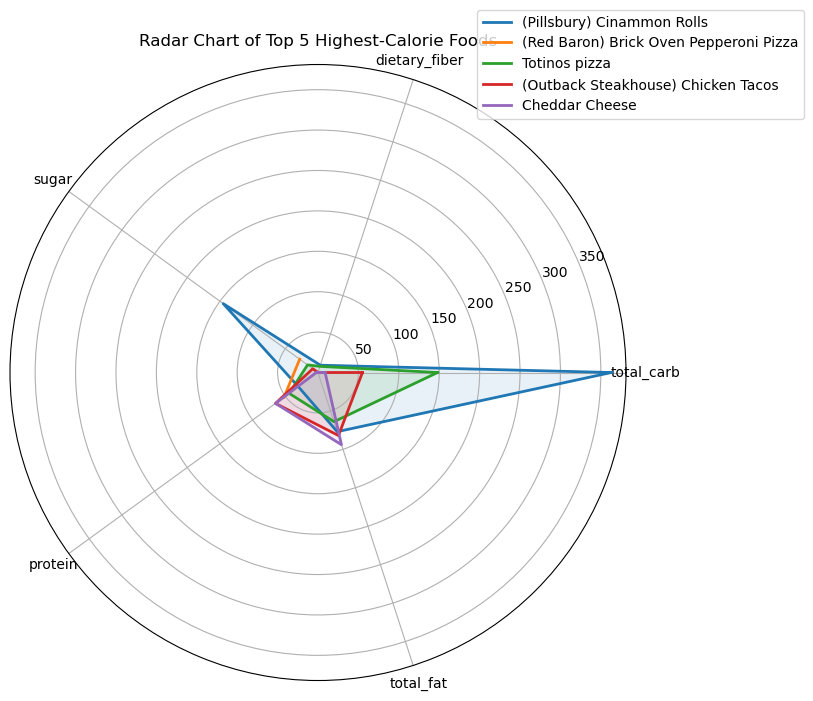

In [21]:
#Third EDA
top5_foods = top_10_food_by_cal.head(5)['logged_food']

labels = ['total_carb', 'dietary_fiber', 'sugar', 'protein', 'total_fat']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close loop

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))


for idx, food_name in enumerate(top5_foods):
    values = food_df[food_df['logged_food'] == food_name][labels].iloc[0].values.tolist()
    values += values[:1]  # close loop
    
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=food_name)
    ax.fill(angles, values, color=colors[idx], alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart of Top 5 Highest-Calorie Foods')
plt.show()


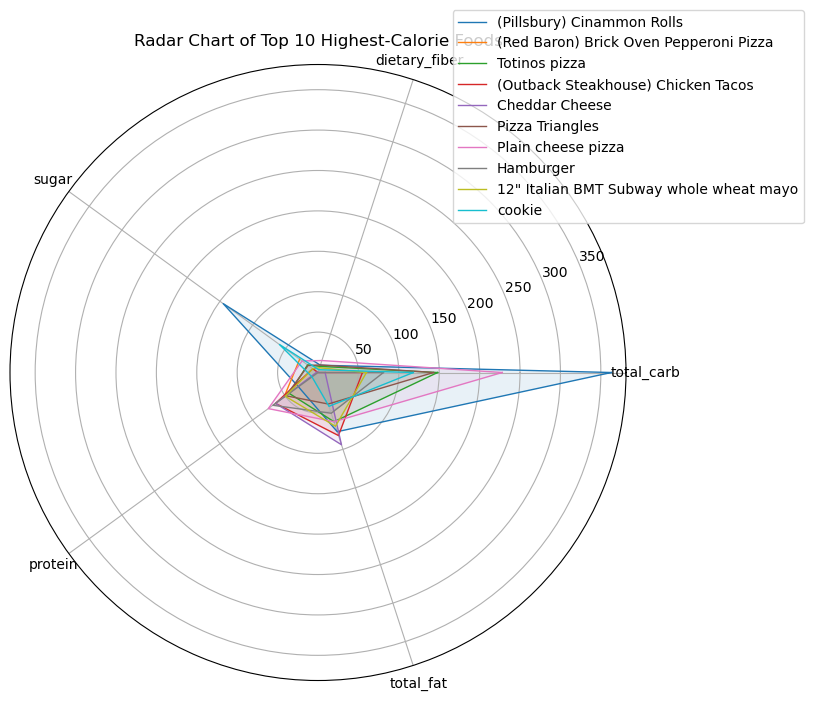

In [17]:
## Optional 4th EDA
# Columns to plot
labels = ['total_carb', 'dietary_fiber', 'sugar', 'protein', 'total_fat']
num_vars = len(labels)

# Prepare angles for radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Initialize plot
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Loop through each top 10 food
for i, row in top_10_food_by_cal.iterrows():
    # get food name
    food_name = row['logged_food']
    
    # fetch nutrient values for this food
    values = food_df[food_df['logged_food'] == food_name][labels].iloc[0].values.tolist()
    values += values[:1]  # close loop

    # plot line
    ax.plot(angles, values, label=food_name, linewidth=1)
    ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Chart of Top 10 Highest-Calorie Foods')
plt.show()


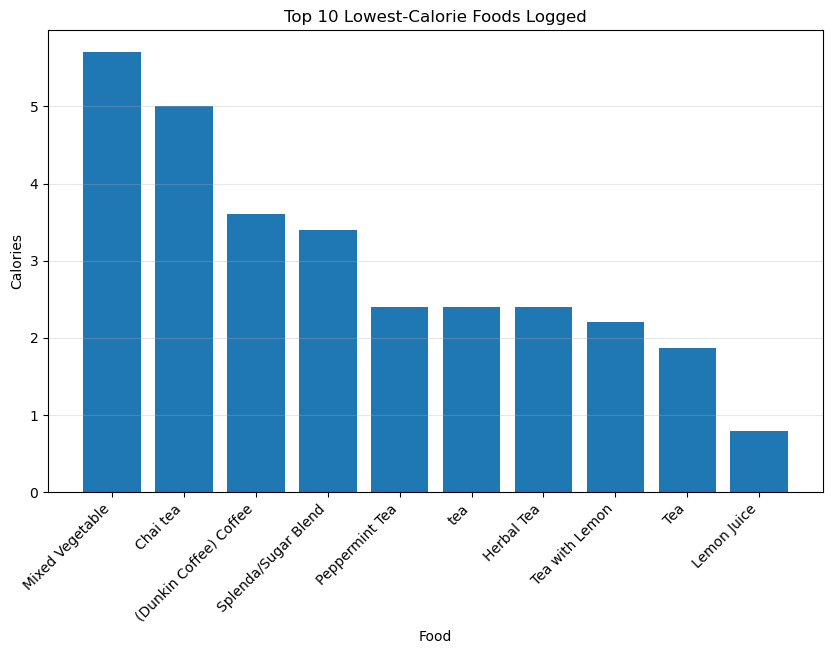

In [18]:
#Optional Fifth EDA
low_10_food_by_cal = food_df[food_df['calorie'] != 0].groupby('logged_food')['calorie'].mean().sort_values(ascending=True).head(10).reset_index()
low_10_food_by_cal = low_10_food_by_cal.sort_values(by = 'calorie',ascending= False)

plt.figure(figsize=(10,6))
plt.bar(low_10_food_by_cal['logged_food'], low_10_food_by_cal['calorie'])
plt.xlabel('Food'); plt.ylabel('Calories')
plt.title('Top 10 Lowest-Calorie Foods Logged')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha = 0.3)
plt.show()

In [ ]:
food_df['logged_food'].unique()

array(['Berry Smoothie', 'Chicken Leg', 'Asparagus',
       'Natrel Lactose Free 2 Percent', 'Standard Breakfast',
       'Breakfast Trail Mix', 'Spinach Salad w/ strawberries and cheese',
       'Egg', 'Acai Smoothie', "(Trader Joe's) Mac and Cheese",
       'Coconut Shrimp', 'Spinach Smoothie',
       'Spinach Salad w/ blueberries, egg, and cheese', 'Babel Cheese',
       'Bourbon Chicken', 'Rice', 'Shrimp', 'Cabbage', 'Hot Chocolate',
       'Salty Sweet Popcorn', 'Chai Tea', 'Maple Brown Sugar Oatmeal',
       'Salad with Cranberries', 'Chicken Nuggets', 'Kale Salad', 'Pizza',
       'Oreo Cookies', 'Muffin', 'Grilled Chicken Wrap',
       'Kale and Fruit Smoothie', 'Ranch Wings', 'Lemon Loaf',
       'Turkey Slider', 'Chicken and Rice', 'Green Smoothie', 'Bagel',
       'Salad', 'Babel bell cheese', 'Tangerine Orange', 'Babybel Cheese',
       'Chicken Salad', 'Pita Bread', 'Cheese Pita', 'Boost'],
      dtype=object)

In [13]:
def read_dexcom(id):
    """
    Read the Dexcom data from a CSV file and return it as a DataFrame.
    """
    copy_df = dexcom_df.copy()
    temp_df = pd.read_csv(f"Dexcom_{id}.csv")
    temp_df = temp_df[11:].drop(columns=['Index'])
    temp_df['ID'] = int(id)
    dexcom_df = pd.concat([copy_df, temp_df], ignore_index=True)
    return dexcom_df

def read_food(id):
    """
    Read the Dexcom data from a CSV file and return it as a DataFrame.
    """
    temp_df = pd.read_csv(f"Food_Log_{id}.csv")
    temp_df['ID'] = int(id)
    food_df = pd.concat([food_df, temp_df], ignore_index=True)

In [14]:
# dexcom_df = pd.read_csv('Dexcom_001.csv')
# dexcom_df = dexcom_df[11:].drop(columns=['Index'])
# dexcom_df['ID'] = int('001')

# food_df = pd.read_csv('Food_Log_001.csv')
# food_df['ID'] = int('011')

# ids = ['002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016']
# for id in ids:
#     read_dexcom(id)
#     read_food(id)

# dexcom_df
# food_df